In [1]:
%pylab inline
import scipy.stats
from collections import defaultdict  # default dictionary 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10.0, 8.0)
%load_ext autoreload
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import tools as t # set of tools for plotting, data splitting, etc..
import time 

In [3]:
np.random.seed(seed=99)

Let's cook some data up for a multi-class classification problem...

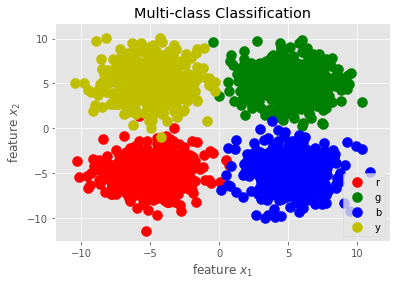

In [4]:
#generate training and testing set...by sampling from mutli-variate Gaussian

cp=5
nclasses=2
mean1 = [-cp,-cp]
mean2 = [cp,cp]
mean3 = [cp,-cp]
mean4 = [-cp,cp]
cov = [[3.0,0.0],[0.0,3.0]] 

#create some points for the training set...
nexamples=2000
size=int(nexamples/4)
x1 = np.random.multivariate_normal(mean1,cov,[size])
x2 = np.random.multivariate_normal(mean2,cov,[size])
x3 = np.random.multivariate_normal(mean3,cov,[size])
x4 = np.random.multivariate_normal(mean4,cov,[size])

X=np.vstack((x1,x2,x3,x4))
Y=np.vstack((1*np.ones((size,1)),2*np.ones((size,1)),3*np.ones((size,1)),4*np.ones((size,1))))


plt.scatter(x1[:,0],x1[:,1], c='r', s=100)
plt.scatter(x2[:,0],x2[:,1], c='g', s=100)            
plt.scatter(x3[:,0],x3[:,1], c='b', s=100)
plt.scatter(x4[:,0],x4[:,1], c='y', s=100)            



plt.title("Multi-class Classification")
plt.xlabel("feature $x_1$")
plt.ylabel("feature $x_2$")
plt.legend(['r','g','b','y'])
fig_ml_in_10 = plt.gcf()
plt.savefig('multi-linear-class.svg',format='svg')
#create some points for the training set..

ntexamples=1000
size=int(ntexamples/4)
x1 = np.random.multivariate_normal(mean1,cov,[size])
x2 = np.random.multivariate_normal(mean2,cov,[size])
x3 = np.random.multivariate_normal(mean3,cov,[size])
x4 = np.random.multivariate_normal(mean4,cov,[size])

Xt=np.vstack((x1,x2,x3,x4))
Yt=np.vstack((1*np.ones((size,1)),2*np.ones((size,1)),3*np.ones((size,1)),4*np.ones((size,1))))

In [5]:
import randomForest as rf

In [6]:
rfc=rf.RandomForest(weaklearner='Linear')
#rfc=rf.RandomForest(weaklearner='Conic')
#rfc=rf.RandomForest()

In [7]:
print (X.shape, Y.shape)

(2000, 2) (2000, 1)


In [8]:
print(np.unique(X))

[-11.43980061 -10.43195922 -10.33377228 ...  10.35665127  10.37755775
  10.93883041]


In [9]:
rfc.train(X,Y)

In [10]:
len(rfc.trees)

10

In [11]:
# Training Confusion Matrix...
Yp=rfc.predict(X)
print (Y.shape, len(Yp))
t.print_confusion_matrix(Yp,Y)

[[1.0 1.0 1.0 ... 4.0 4.0 4.0]
 [1.0 1.0 1.0 ... 4.0 4.0 4.0]
 [1.0 1.0 1.0 ... 4.0 4.0 4.0]
 ...
 [1.0 1.0 1.0 ... 4.0 4.0 4.0]
 [1.0 1.0 1.0 ... 4.0 4.0 1.0]
 [1.0 1.0 1.0 ... 4.0 4.0 4.0]]
(2000, 1) 2000


Predicted,1.0,2.0,3.0,4.0,All
Actual,,,,,
1.0,495,0,3,2,500
2.0,0,499,0,1,500
3.0,0,2,498,0,500
4.0,2,2,0,496,500
All,497,503,501,499,2000


In [12]:
from nose.tools import assert_greater_equal
acc = np.sum(Y.flatten() ==  np.array(Yp)) / float(Y.shape[0])

assert_greater_equal(acc, 0.78)
print (acc)

0.994


In [13]:
#Testing Confusion Matrix...
Ypt=rfc.predict(Xt)
print (Y.shape, len(Ypt))
# t.print_confusion_matrix(Ypt,Yt)

[[1.0 1.0 1.0 ... 4.0 4.0 4.0]
 [1.0 1.0 1.0 ... 4.0 4.0 4.0]
 [1.0 1.0 1.0 ... 4.0 4.0 4.0]
 ...
 [1.0 1.0 1.0 ... 4.0 4.0 4.0]
 [1.0 1.0 1.0 ... 4.0 4.0 4.0]
 [1.0 1.0 1.0 ... 4.0 4.0 4.0]]
(2000, 1) 1000


In [14]:
from nose.tools import assert_greater_equal
acc = np.sum(Yt.flatten() ==  np.array(Ypt)) / float(Yt.shape[0]) 

assert_greater_equal(acc, 0.78)
print(acc)

0.996


### Lets Plot Per-Tree Decision Boundary

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

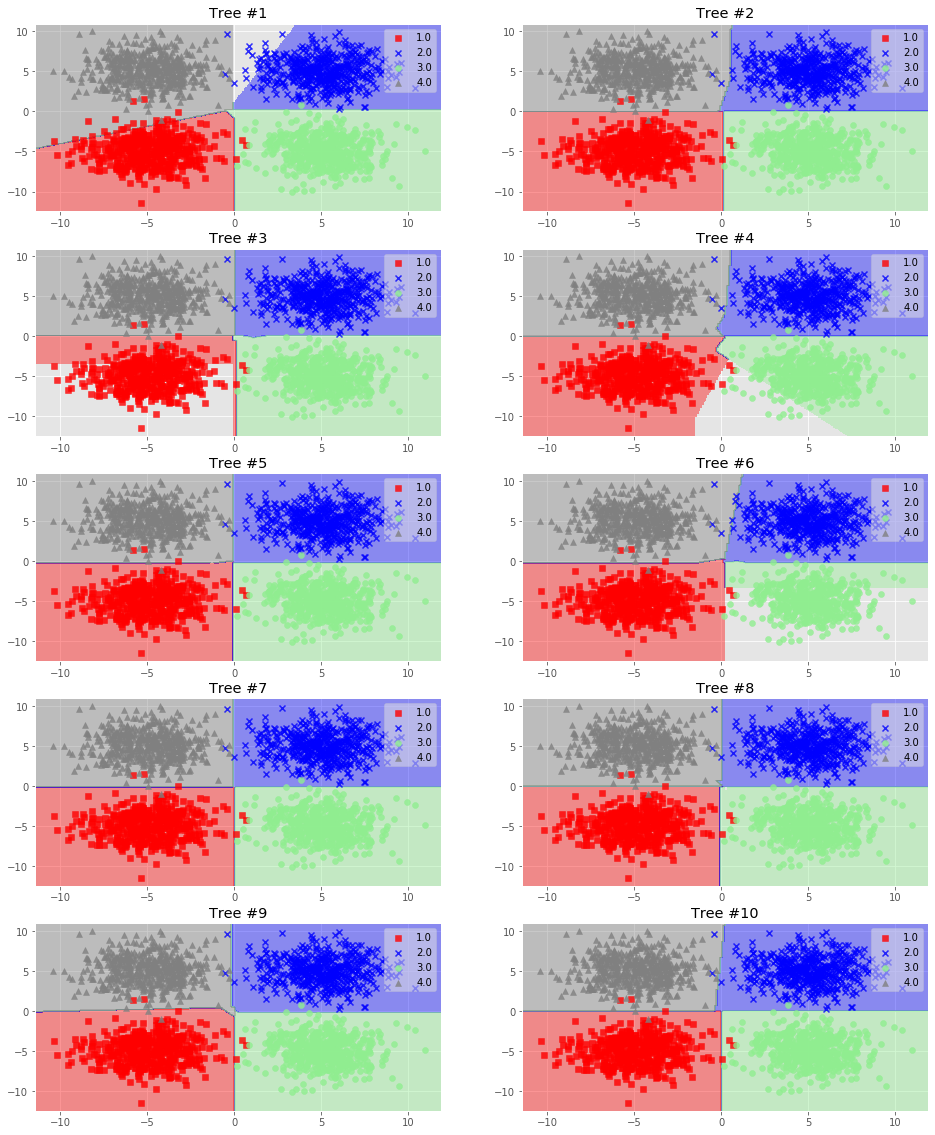

In [15]:
ntrees=rfc.ntrees
nrows=int(ntrees/2)
ncols=2
i=1
plt.subplots(nrows,ncols,figsize=(16,20))
for tree in rfc.trees:
    plt.subplot(nrows,ncols,i);
    t.plot_decision_regions(X,np.squeeze(Y),clf=tree,res=0.1);
    plt.title('Tree #{}'.format(i))
    i = i+1
plt.tight_layout

## Lets Run on Nonlinear Data, The Spherical Examples...

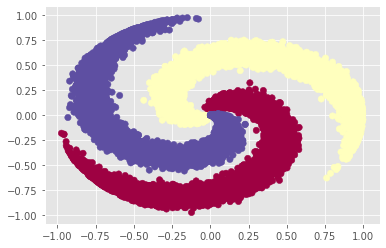

In [16]:
#Get Training Data from a spherical distribution and ...
X,Y=t.get_spherical_data(N=10000)

In [17]:
print (X.shape, Y.shape)

(30000, 2) (30000,)


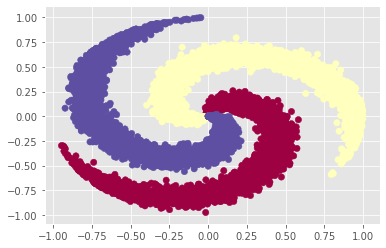

In [18]:
#Get Test Data 
Xtest,Ytest=t.get_spherical_data(N=5000)

In [19]:
rfc=rf.RandomForest(weaklearner='Linear',usebagging=False,ntrees=20)
rfc.train(X,Y[:,np.newaxis])

In [20]:
#Training Confusion Matrix
Yp=rfc.predict(X)
print (Y.shape, len(Yp))
t.print_confusion_matrix(Yp,Y)

[[0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 ...
 [1 1 1 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [1 1 1 ... 2 2 2]]
(30000,) 30000


Predicted,0,1,2,All
Actual,,,,
0,9672,4,324,10000
1,521,9462,17,10000
2,1135,74,8791,10000
All,11328,9540,9132,30000


In [34]:
#Testing Confusion Matrix
Ypt=rfc.predict(Xtest)
print (Y.shape, len(Ypt))
t.print_confusion_matrix(Ypt,Ytest)

[[0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 1]
 [2 2 2 ... 2 2 1]
 ...
 [1 1 1 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [1 1 1 ... 2 2 1]]
(30000,) 15000


Predicted,0,1,2,All
Actual,,,,
0,4844,4,152,5000
1,264,4731,5,5000
2,568,40,4392,5000
All,5676,4775,4549,15000


In [21]:
from nose.tools import assert_greater_equal
acc = np.sum(Y.flatten() ==  np.array(Yp)) / float(Y.shape[0]) 

assert_greater_equal(acc, 0.78)
print(acc)

0.9308333333333333


(10000, 2)
[[1 0 2 ... 0 1 2]
 [1 0 2 ... 0 1 2]
 [1 0 2 ... 1 1 2]
 ...
 [1 0 2 ... 0 1 2]
 [1 0 2 ... 0 1 2]
 [1 0 2 ... 0 1 2]]
[0, 1, 2]


AttributeError: 'AxesSubplot' object has no attribute 'hold'

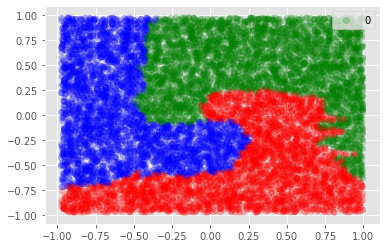

In [22]:
t.plot_points_range(rfc,X,Y)

(30000, 2) (30000,)
[[2 2 2 ... 2 2 2]]
Trees= 1  and Accuracy= 0.8059333333333333
[[1 1 1 ... 2 1 2]
 [1 0 0 ... 2 1 2]]
Trees= 2  and Accuracy= 0.8556666666666667
[[1 1 1 ... 2 1 2]
 [0 0 0 ... 2 2 2]
 [2 2 2 ... 1 1 2]]
Trees= 3  and Accuracy= 0.8914666666666666
[[0 0 0 ... 2 1 2]
 [1 1 1 ... 2 1 2]
 [2 2 2 ... 2 1 2]
 [0 0 0 ... 2 2 2]]
Trees= 4  and Accuracy= 0.8784
[[0 0 0 ... 2 1 2]
 [0 0 0 ... 2 1 2]
 [1 1 1 ... 2 1 2]
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]]
Trees= 5  and Accuracy= 0.8514
[[1 1 1 ... 2 1 2]
 [0 0 0 ... 2 1 2]
 [1 1 1 ... 2 1 2]
 [0 0 0 ... 2 1 2]
 [2 2 2 ... 2 1 2]
 [0 0 0 ... 2 1 2]]
Trees= 6  and Accuracy= 0.8846
[[0 0 0 ... 1 1 2]
 [0 0 0 ... 2 1 2]
 [0 0 0 ... 2 1 2]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 2 1 2]
 [2 2 2 ... 1 1 1]]
Trees= 7  and Accuracy= 0.9408
[[0 0 0 ... 1 1 1]
 [1 1 1 ... 2 2 1]
 [1 1 1 ... 2 1 2]
 ...
 [0 0 0 ... 2 1 2]
 [1 1 1 ... 2 1 2]
 [0 0 0 ... 2 2 2]]
Trees= 8  and Accuracy= 0.9184
[[1 1 1 ... 2 1 2]
 [0 0 0 ... 2 1 2]
 [0 0 0 ... 2

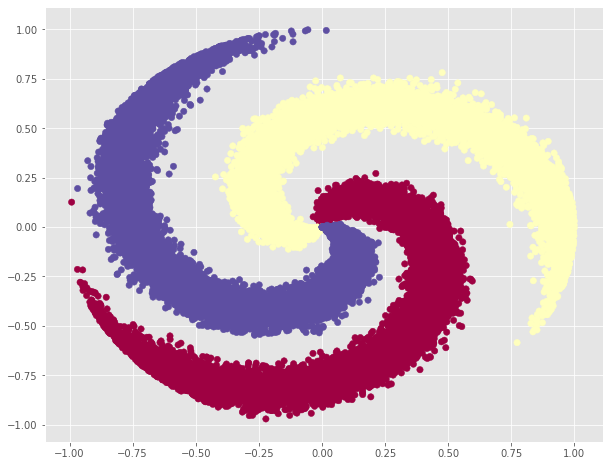

In [37]:
import tools as t
X,Y=t.get_spherical_data(N=10000)
print (X.shape, Y.shape)
Xtest,Ytest=t.get_spherical_data(N=5000)

trees = np.arange(1, 21)
acc = np.zeros(20)
i = 0
for tree in trees:
    rfc=rf.RandomForest(weaklearner='Linear',usebagging=False,ntrees=tree)
    rfc.train(X,Y[:,np.newaxis])
    
    '''
    ----------------
    #takes almost 6sec
    #to calculate acc of each tree
    ----------------
    
    '''
    
    Ypt = rfc.predict(Xtest)

    acc[i] = np.sum(Ytest ==  np.array(Ypt)) / float(Ytest.shape[0]) 

    print ("Trees=", tree, " and Accuracy=", acc[i])
    i += 1

rf_acc = np.sum(acc)/20   
print("Overall accuracy = ", rf_acc)